In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from class2 import facies_classification, Petrophysics, rename_columns, rearrange_columns

In [2]:
well = pd.read_csv('data/freeman_well_4_perm.csv')
well.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364


In [3]:
old_names = ['DEPT', 'DEN', 'NEUT', 'RES_DEP']#list(well.columns)
new_names = ['Depth', 'RHOB', 'NPHI', 'Log_ILD']
df = rename_columns(well, old_names, new_names)

In [4]:
order = ['Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI', 'PERM']
data = rearrange_columns(df, order)

In [5]:
data.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM
0,7564.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364
1,7565.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364
2,7565.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364
3,7566.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364
4,7566.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364


In [6]:
data['Facies'] = facies_classification(data['GR'])

In [7]:
data.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies
0,7564.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN
1,7565.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN
2,7565.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN
3,7566.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN
4,7566.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN


In [8]:
data['Facies'].unique()

array([nan,  1.,  2.,  3.])

In [9]:
test = Petrophysics(data)

In [10]:
x = test.slowness_to_velocity(2)

In [11]:
data.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity
0,7564.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN
1,7565.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN
2,7565.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN
3,7566.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN
4,7566.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN


In [12]:
data.describe()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity
count,7586.000000,7352.000000,7350.000000,7586.000000,7586.000000,7352.000000,7586.000000,7.586000e+03,7352.000000,7.350000e+03
mean,9460.750000,108.189529,18.933387,118.441103,2.326999,0.423099,0.208390,9.338403e+03,2.812432,9.424697e+05
std,1095.016952,23.541196,176.943528,11.924260,0.081725,0.066108,0.052728,2.328137e+05,0.576408,4.069030e+05
min,7564.500000,32.593900,0.081200,84.811200,1.863100,0.099500,0.055100,1.076985e-02,1.000000,5.128205e+02
25%,8512.625000,101.771775,0.878350,108.603500,2.272600,0.385175,0.167300,1.887876e+00,3.000000,7.307805e+05
50%,9460.750000,112.463100,1.025600,115.442700,2.342500,0.422200,0.198400,7.905111e+00,3.000000,9.750390e+05
75%,10408.875000,120.219250,1.368400,128.824075,2.390700,0.461400,0.243500,6.306856e+01,3.000000,1.138498e+06
max,11357.000000,219.338000,1950.000000,158.538400,2.564600,0.656900,0.507700,1.211313e+07,3.000000,1.231527e+07


# FEATURE ENGINEERING

Detecting outlier ussing Z Score method

In [13]:
# imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

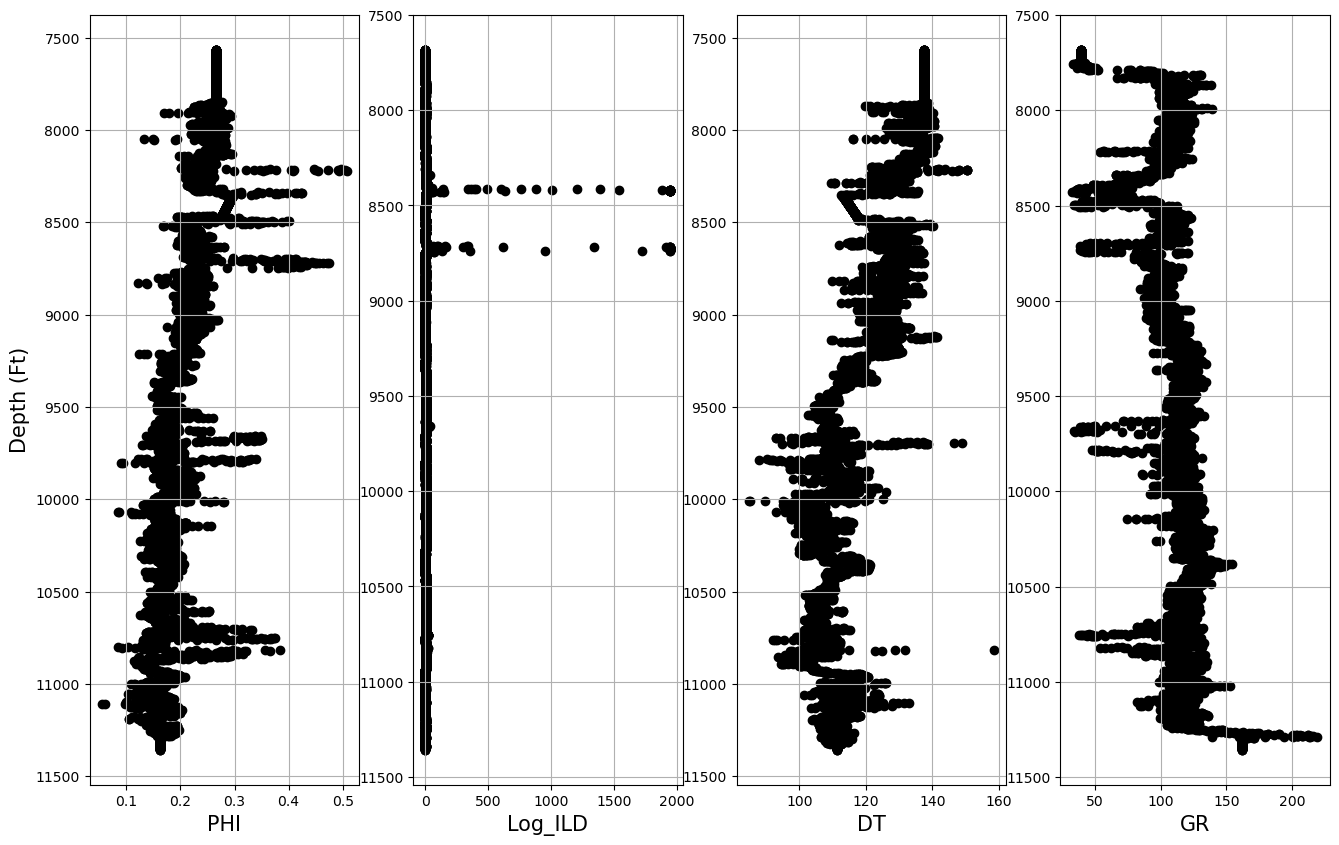

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(16,10),linewidth=3)

curves = ['PHI','Log_ILD','DT','GR']

for i in range(len(curves)):
    ax[i].scatter(df[curves[i]],df['Depth'],c='k')
    ax[i].set_xlabel(curves[i],fontsize=15)
    ax[0].set_ylabel('Depth (Ft)',fontsize=15)
    ax[i].yaxis.grid(True)
    ax[i].xaxis.grid(True)
    ax[i].invert_yaxis()

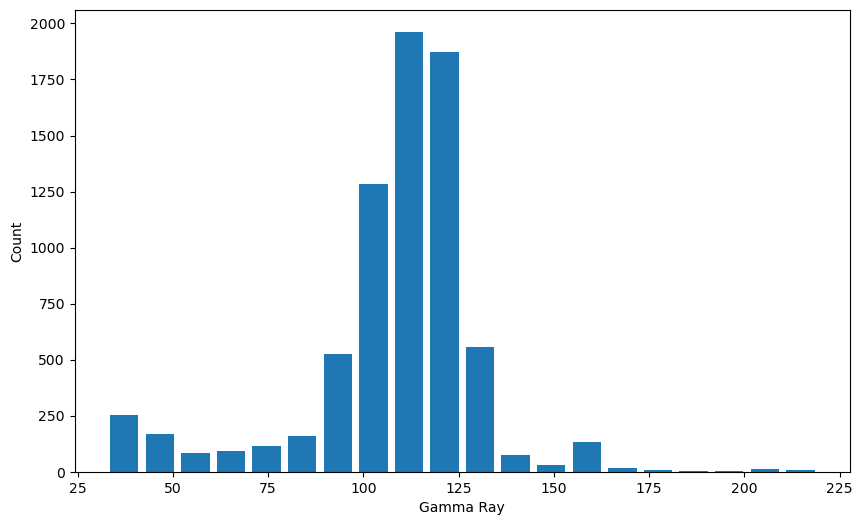

In [15]:
plt.hist(data.GR, bins=20, rwidth=0.8)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')
plt.show()

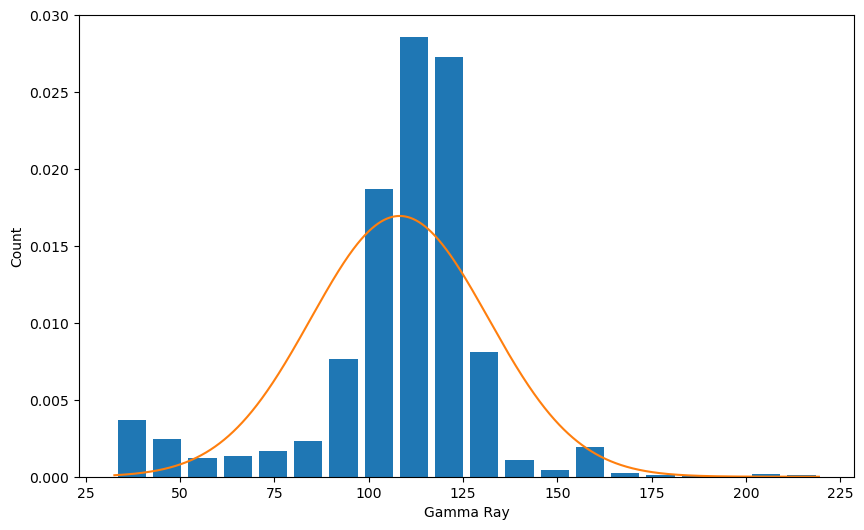

In [16]:
from scipy.stats import norm

plt.hist(data.GR, bins=20, rwidth=0.8, density=True)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')

rng = np.arange(data.GR.min(), data.GR.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.GR.mean(),data.GR.std()))

In [17]:
data.GR.mean()

108.18952928454911

In [18]:
data.GR.std()

23.5411961087997

# Outlier detection and removal using Z Score

In [19]:
data['zscore'] = ( data.GR - data.GR.mean() ) / data.GR.std()
data.head(5)

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,zscore
0,7564.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN,NaN
1,7565.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN,NaN
2,7565.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN,NaN
3,7566.0,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN,NaN
4,7566.5,NaN,NaN,137.507,2.2382,NaN,0.2657,175.29364,NaN,NaN,NaN


In [20]:
data[data['zscore']>3].head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,zscore
7422,11275.5,182.0136,0.8267,112.0898,2.3811,0.4502,0.1735,2.511657,3.0,1.209629e+06,3.135952
7423,11276.0,190.3772,0.8160,112.4967,2.3959,0.4400,0.1639,1.614287,3.0,1.225490e+06,3.491227
7424,11276.5,189.7021,0.7965,112.7246,2.4047,0.4323,0.1583,1.247362,3.0,1.255493e+06,3.462550
7425,11277.0,181.9346,0.7820,113.5807,2.4081,0.4279,0.1561,1.127190,3.0,1.278772e+06,3.132597
7426,11277.5,179.6507,0.8000,113.2389,2.4042,0.4497,0.1586,1.264712,3.0,1.250000e+06,3.035579


In [21]:
data[data['zscore']<-3].head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,zscore
378,7753.5,36.3887,0.9332,137.507,2.2382,0.6023,0.2657,175.29364,1.0,1.071582e+06,-3.050008
379,7754.0,33.2530,0.9332,137.507,2.2382,0.5853,0.2657,175.29364,1.0,1.071582e+06,-3.183208
380,7754.5,33.9191,0.9332,137.507,2.2382,0.6019,0.2657,175.29364,1.0,1.071582e+06,-3.154913
384,7756.5,35.6284,0.9332,137.507,2.2382,0.5703,0.2657,175.29364,1.0,1.071582e+06,-3.082304
385,7757.0,37.3668,0.9332,137.507,2.2382,0.5627,0.2657,175.29364,1.0,1.071582e+06,-3.008459


In [22]:
data[(data.zscore<-3) | (data.zscore>3)].head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,zscore
378,7753.5,36.3887,0.9332,137.507,2.2382,0.6023,0.2657,175.29364,1.0,1.071582e+06,-3.050008
379,7754.0,33.2530,0.9332,137.507,2.2382,0.5853,0.2657,175.29364,1.0,1.071582e+06,-3.183208
380,7754.5,33.9191,0.9332,137.507,2.2382,0.6019,0.2657,175.29364,1.0,1.071582e+06,-3.154913
384,7756.5,35.6284,0.9332,137.507,2.2382,0.5703,0.2657,175.29364,1.0,1.071582e+06,-3.082304
385,7757.0,37.3668,0.9332,137.507,2.2382,0.5627,0.2657,175.29364,1.0,1.071582e+06,-3.008459


In [23]:
df2 = data[(data.zscore>-3) & (data.zscore<3)]
df2.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,zscore
234,7681.5,39.0321,NaN,137.507,2.2382,0.5983,0.2657,175.29364,1.0,NaN,-2.937719
235,7682.0,39.0321,NaN,137.507,2.2382,0.5983,0.2657,175.29364,1.0,NaN,-2.937719
236,7682.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,-2.937719
237,7683.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,-2.937719
238,7683.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,-2.937719


In [24]:
df2.shape

(7288, 11)

In [25]:
data.shape

(7586, 11)

In [26]:
df2.isnull().sum()

Depth       0
GR          0
Log_ILD     2
DT          0
RHOB        0
NPHI        0
PHI         0
PERM        0
Facies      0
velocity    2
zscore      0
dtype: int64

In [27]:
df3 = df2.dropna()
df3.isnull().sum()

Depth       0
GR          0
Log_ILD     0
DT          0
RHOB        0
NPHI        0
PHI         0
PERM        0
Facies      0
velocity    0
zscore      0
dtype: int64

In [28]:
df3.drop(['zscore'],axis=1,inplace=True)

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_23632\3802205910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['zscore'],axis=1,inplace=True)


In [29]:
df3['Facies'].unique()

array([1., 2., 3.])

In [30]:
tops = ('Lower Pliocene', 'Upper Miocene', 'MFS 5.0', 'Top Upper Miocene', 'MFS 6.0', 'MFS 7.4', 'Middle Miocene',
            'MFS 9.5', 'Top Middl Miocene')
tops_depths = (1508.76, 1889.76, 1954.92, 2094.59, 2182.99, 2349.8, 2559.63, 2620.07, 2674.83)

In [31]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.Depth >= top_depth) & (df.Depth <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
#    ax01=ax[0].twiny()
#    ax01.set_xlim(-100,10)
#    ax01.spines['top'].set_position(('outward',0))
#    ax01.set_xlabel("SP [mV]")
#    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
#    ax01.set_xlabel('SP[mV]',color='blue')    
#    ax01.tick_params(axis='x', colors='blue')
#    ax01.grid(True)
    
    
#    ax02=ax[0].twiny()
#    ax02.set_xlim(6,36)
#    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
#    ax02.spines['top'].set_position(('outward',40))
#    ax02.set_xlabel('CALI[in]',color='black')    
#    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.Depth, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.Log_ILD, logs.Depth, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
#    ax12=ax[1].twiny()
#    ax12.set_xlim(0.1,100)
#    ax12.set_xscale('log')
#    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
#    ax12.spines['top'].set_position(('outward',40))
#    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
#    ax12.tick_params(axis='x', colors='purple')
    
        
#    ax13=ax[1].twiny()
#    ax13.set_xlim(0.1,100)
#    ax13.set_xscale('log')
#    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
#    ax13.spines['top'].set_position(('outward',0))
#    ax13.set_xlabel('LL8[m.ohm]',color='black')
#    ax13.tick_params(axis='x', colors='black')

    
#3rd track: RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(150,80)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.Depth, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.Depth, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.Depth ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')
    

#3rd track: DT track

    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

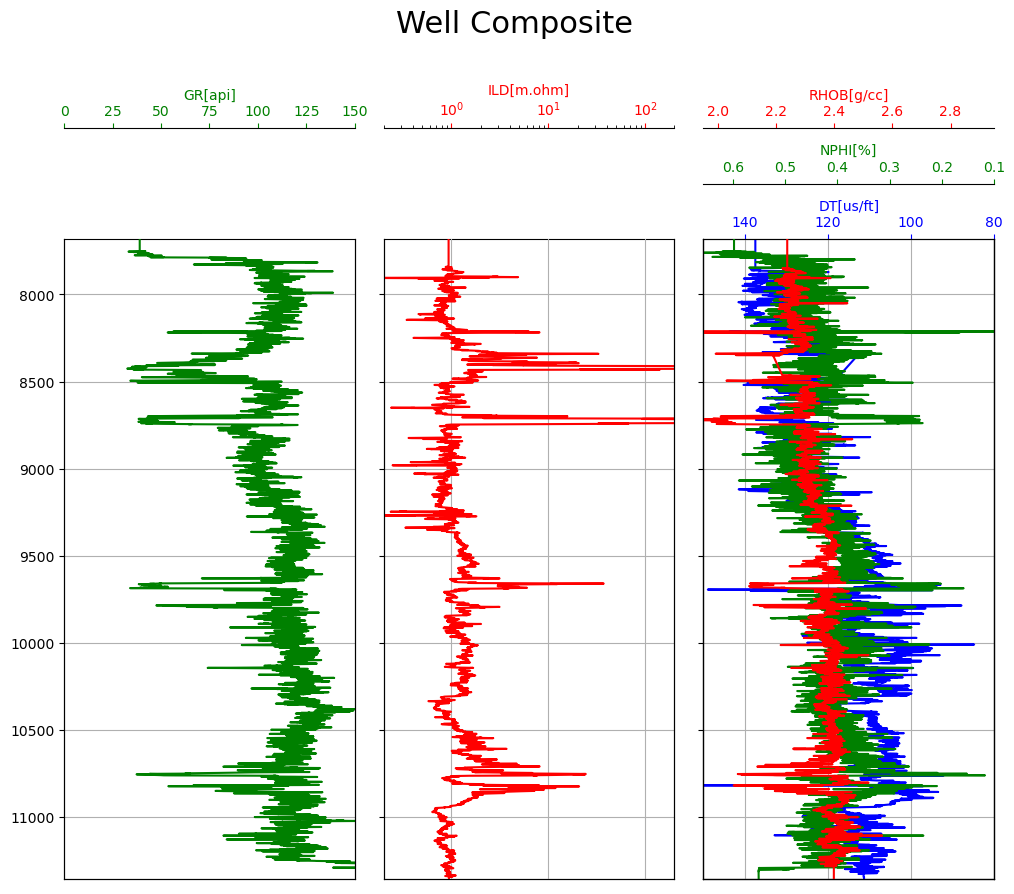

In [32]:
#%matplotlib nbagg

triple_combo_plot(df3.Depth.min(), df3.Depth.max())

In [33]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns

In [34]:
#del facies_colors, facies_labels

facies_colors = ['r', 'b','g']

facies_labels = [0, 1, 2,]

# facies_colors = ['r', 'b','g','#6E2C00',
#        '#1B4F72','k']

# facies_labels = [0, 1, 2, 3, 4,
#                  5]

In [35]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
df3['Facies_code']= lab_enc.fit_transform(df3['Facies'])
df3.head()

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_23632\2329910612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Facies_code']= lab_enc.fit_transform(df3['Facies'])


,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,Facies_code
236,7682.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,0
237,7683.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,0
238,7683.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,0
239,7684.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,0
240,7684.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,1.071582e+06,0


In [36]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#DC7633','#6E2C00']

facies_labels = ['sand', 'shaly sand', 'shale']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies_code'] -1]
    
# df3.loc[:,'FaciesLabels'] = df3.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [37]:
# df3.drop(['FaciesLabels'],axis=1,inplace=True)
# df3.head()

In [38]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies_code'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.Log_ILD, logs.Depth, '-')
    ax[2].plot(logs.NPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.RHOB, logs.Depth, '-', color='r')
    ax[4].plot(logs.DT, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=2)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="25%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join(['sand', 'shaly sand', 'shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.Log_ILD.min(),logs.Log_ILD.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("DT")
    ax[4].set_xlim(logs.DT.min(),logs.DT.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    # f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

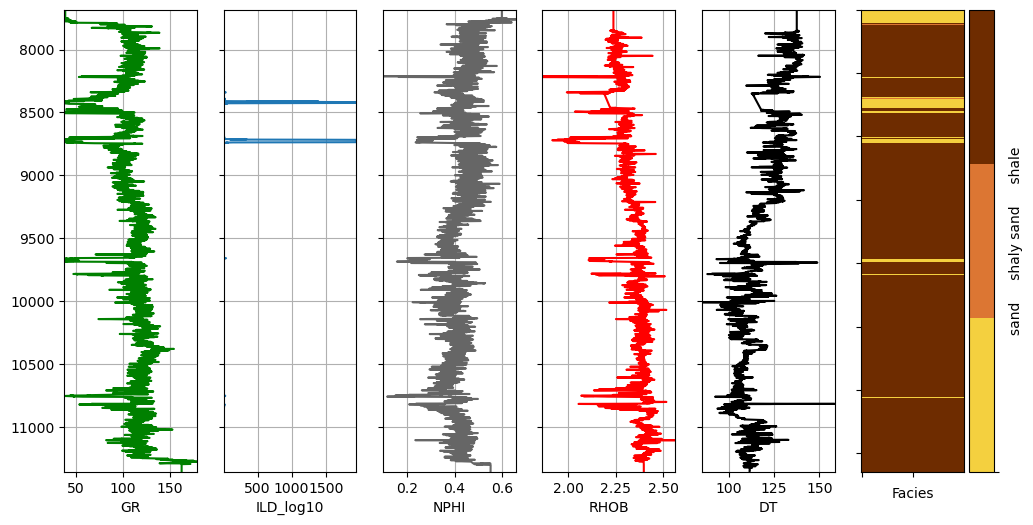

In [39]:
make_facies_log_plot(
    df3,
    facies_colors)

sand           625
shaly sand      57
shale         6604
Name: Facies, dtype: int64

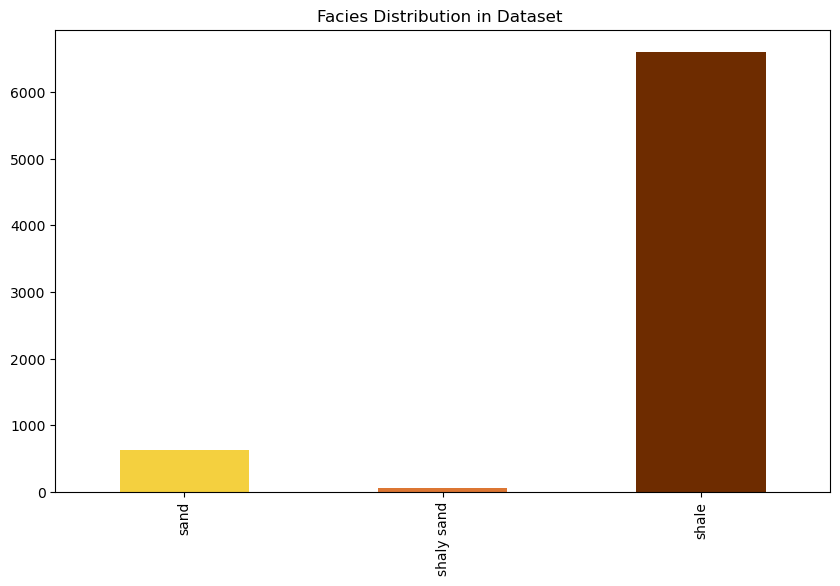

In [40]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = df3['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Facies Distribution in Dataset ')
facies_counts
#plt.savefig("F_Dist.png", dpi=300)

In [41]:
df3.describe()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,Facies_code
count,7286.000000,7286.000000,7286.000000,7286.000000,7286.000000,7286.000000,7286.000000,7.286000e+03,7286.000000,7.286000e+03,7286.000000
mean,9517.276352,108.163436,16.647403,117.850574,2.330201,0.423016,0.206324,9.691201e+03,2.820615,9.447880e+05,1.820615
std,1056.427949,22.303899,167.046140,11.625088,0.081099,0.065935,0.052322,2.375493e+05,0.564634,4.050703e+05,0.564634
min,7682.500000,37.810800,0.081200,84.811200,1.863100,0.099500,0.055100,1.076985e-02,1.000000,5.128205e+02,0.000000
25%,8608.125000,101.914675,0.877900,108.402500,2.282625,0.384900,0.166700,1.836431e+00,3.000000,7.322923e+05,2.000000
50%,9518.750000,112.481050,1.025900,114.944650,2.347100,0.422100,0.195400,6.885164e+00,3.000000,9.747539e+05,2.000000
75%,10430.875000,120.165375,1.365575,127.965500,2.391600,0.461475,0.237000,4.675485e+01,3.000000,1.139082e+06,2.000000
max,11357.000000,178.320800,1950.000000,158.538400,2.564600,0.656900,0.507700,1.211313e+07,3.000000,1.231527e+07,2.000000


In [42]:
df3.to_csv('data/freeman_well_4_eng.csv', index=False)